In [30]:
#importing necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.api.types import is_numeric_dtype

In [31]:
#importing dataset
df = pd.read_csv("student_performance_500.csv")

In [32]:
#seeing top 5 row using head()
df.head()

,Study_Hours,Sleep_Hours,Attendance_Percent,Previous_Exam_Score,Final_Exam_Score
0,3.496714,7.926178,98.993554,71.675416,88.328267
1,2.861736,8.909417,94.246337,51.732214,80.371705
2,3.647689,5.601432,85.596304,47.727017,70.248906
3,4.523030,7.562969,78.530632,59.949383,83.740223
4,2.765847,6.349357,91.982233,57.447231,67.633437


In [33]:
#seeing shape of the dataset
df.shape

(500, 5)

In [34]:
#seeing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study_Hours          500 non-null    float64
 1   Sleep_Hours          500 non-null    float64
 2   Attendance_Percent   500 non-null    float64
 3   Previous_Exam_Score  500 non-null    float64
 4   Final_Exam_Score     500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [35]:
#seeing mean , median, std etc using describe()
df.describe()

,Study_Hours,Sleep_Hours,Attendance_Percent,Previous_Exam_Score,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.008560,7.031826,85.694208,60.491010,78.916915
std,0.976255,0.977997,9.400030,14.605957,9.253502
min,0.500000,4.303113,56.037446,20.000000,49.152173
25%,2.299693,6.404708,78.975704,50.820958,72.741427
50%,3.012797,7.028532,86.198058,59.866300,78.497215
75%,3.636783,7.651242,92.547384,70.496541,85.544966
max,6.852731,9.632382,100.000000,100.000000,100.000000


In [36]:
#seeing duplicated value
df.duplicated().sum()

np.int64(0)

In [37]:
#seeing NAN value
df.isna().sum()

Study_Hours            0
Sleep_Hours            0
Attendance_Percent     0
Previous_Exam_Score    0
Final_Exam_Score       0
dtype: int64

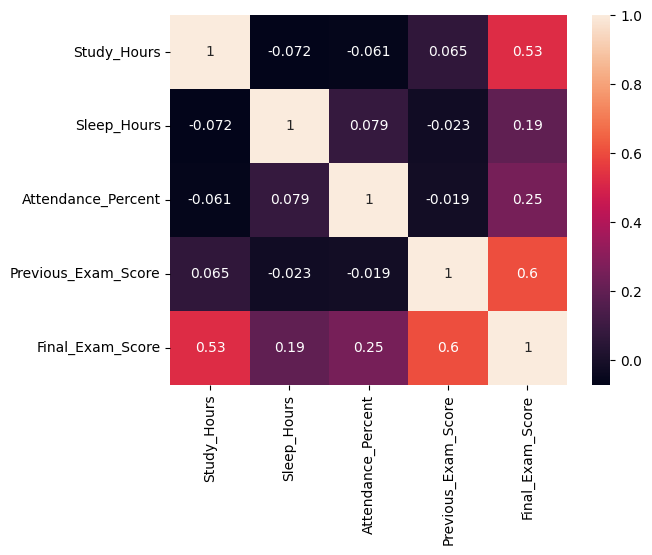

In [38]:
#seeing corelation
sns.heatmap(df.corr(), annot=True)
plt.show()

In [39]:
df.columns

Index(['Study_Hours', 'Sleep_Hours', 'Attendance_Percent',
       'Previous_Exam_Score', 'Final_Exam_Score'],
      dtype='object')

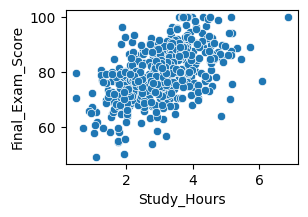

In [40]:
#relation between study hours and final exam score
plt.figure(figsize=(3,2))
sns.scatterplot(x='Study_Hours', y='Final_Exam_Score', data=df)
plt.show()

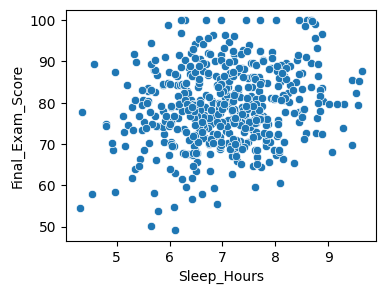

In [41]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Sleep_Hours', y='Final_Exam_Score', data=df)
plt.show()

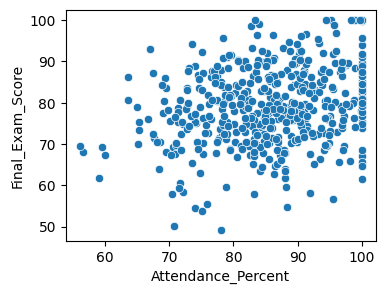

In [42]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Attendance_Percent', y='Final_Exam_Score', data=df)
plt.show()

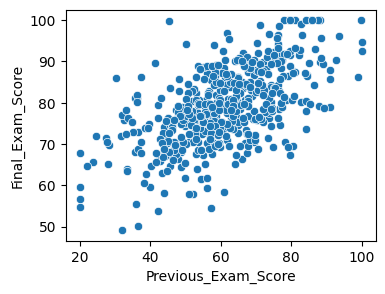

In [43]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Previous_Exam_Score', y='Final_Exam_Score', data=df)
plt.show()

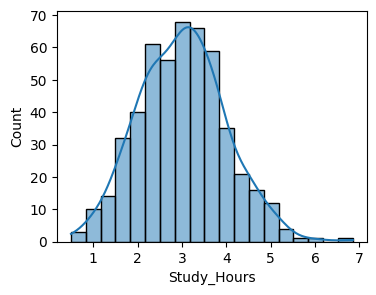

In [44]:
plt.figure(figsize=(4,3))
sns.histplot(df['Study_Hours'], kde=True)
plt.show()

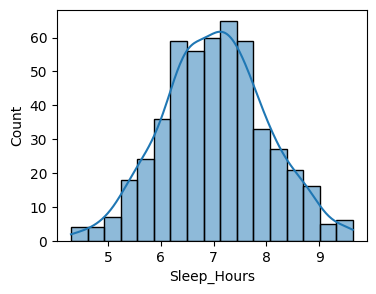

In [45]:
plt.figure(figsize=(4,3))
sns.histplot(df['Sleep_Hours'], kde=True)
plt.show()

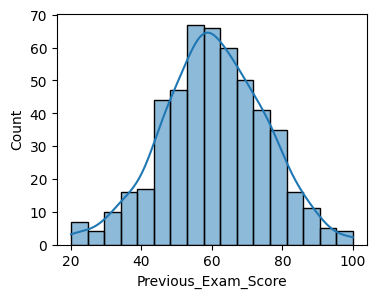

In [46]:
plt.figure(figsize=(4,3))
sns.histplot(df['Previous_Exam_Score'], kde=True)
plt.show()

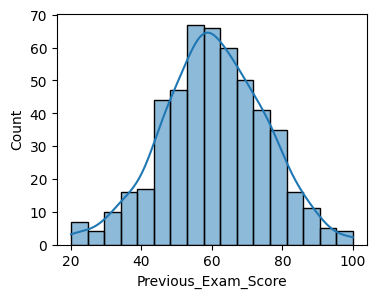

In [47]:
plt.figure(figsize=(4,3))
sns.histplot(df['Previous_Exam_Score'], kde=True)
plt.show()

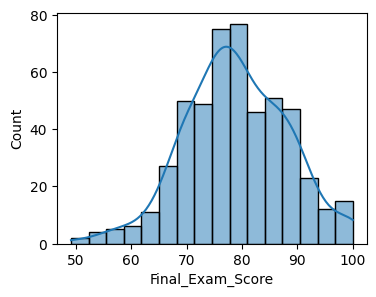

In [48]:
plt.figure(figsize=(4,3))
sns.histplot(df['Final_Exam_Score'], kde=True)
plt.show()

In [62]:
select_col = df.drop(['Final_Exam_Score'], axis=1)

Study_Hours


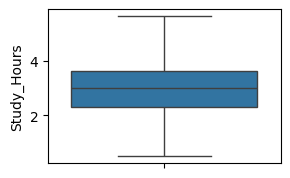

Sleep_Hours


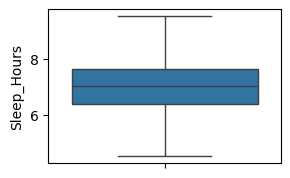

Attendance_Percent


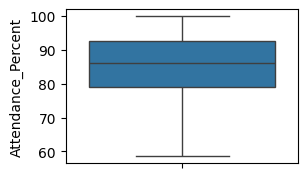

Previous_Exam_Score


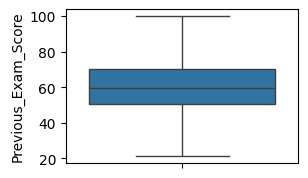

In [63]:
#boxplot for seeing outlier
for col in select_col:
    print(col)
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col])
    plt.show()

In [51]:
#removing outlier
def outlier (df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    iqr = q3 - q1

    up_wh = q3 + 1.5 * iqr
    low_wh = q1 - 1.5 * iqr

    df[col] = np.clip(df[col], up_wh, low_wh)
    return df

In [52]:
df_clean = df.copy()

In [53]:
for col2 in select_col:
    #print(col2)
    df_clean = outlier(df_clean, col2)

In [54]:
df = df_clean.copy()

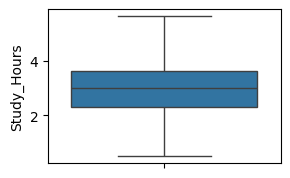

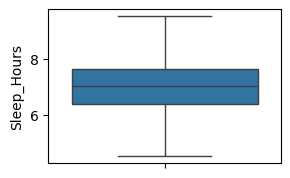

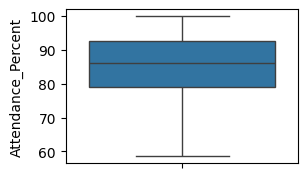

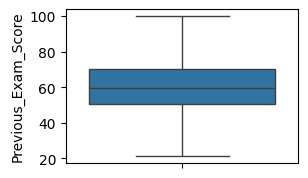

In [60]:
for col3 in select_col:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col3])
    plt.show()

In [64]:
#feature / target split
x = df[['Study_Hours', 'Sleep_Hours', 'Attendance_Percent', 'Previous_Exam_Score']]
y = df[['Final_Exam_Score']]

In [65]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
xtrain.head()

,Study_Hours,Sleep_Hours,Attendance_Percent,Previous_Exam_Score
249,3.404982,5.593339,69.441044,75.015691
433,3.717542,4.801194,79.169226,58.410775
19,1.587696,7.751387,89.241659,87.811388
322,2.181779,9.298898,84.295012,56.627160
332,3.075805,5.995859,82.865571,74.297050


In [67]:
ytrain.head()

,Final_Exam_Score
249,83.658427
433,74.433406
19,79.142017
322,79.734925
332,74.359864


In [71]:
#liner model implentation
lr = LinearRegression()

In [72]:
lin_model = lr.fit(xtrain, ytrain)

In [73]:
lin_model.score(xtrain, ytrain)

0.7261124633632454

In [74]:
lin_model.score(xtest, ytest)

0.7704362104788003

In [75]:
lin_pred_y = lin_model.predict(xtest)

In [76]:
#mae
mae = mean_absolute_error(ytest, lin_pred_y)
mae

3.7738144234193918

In [77]:
#mse 
mse = mean_squared_error(ytest, lin_pred_y)
mse

20.832189464390577

In [79]:
#r2 score
r2 = r2_score(ytest, lin_pred_y)
r2

0.7704362104788003